In [1]:
import pandas as pd
data=pd.read_csv('Customers.csv')

In [2]:
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
9,10,Female,30,19,72
82,83,Male,67,54,41
40,41,Female,65,38,35
31,32,Female,21,30,73
188,189,Female,41,103,17


In [3]:
data=data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
data=data.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'})

In [6]:
data.sample(5)

,Annual Income,Spending Score
57,44,46
170,87,13
159,78,73
135,73,88
33,33,92


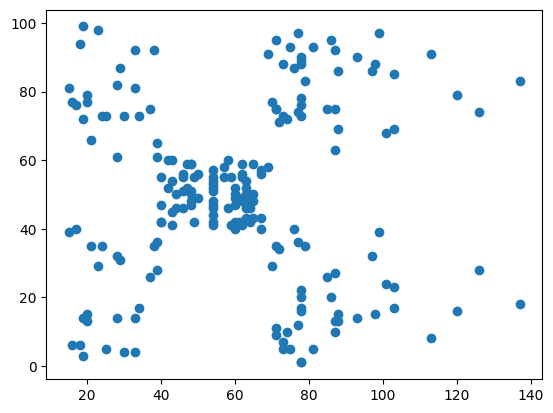

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data['Annual Income'], data['Spending Score'])

In [8]:
from sklearn.cluster import KMeans
k_values=[1,2,3,4,5,6,7,8,9,10]
wcss_error=[]
for k in k_values:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data[['Annual Income', 'Spending Score']])
    wcss_error.append(kmeans.inertia_)

In [9]:
wcss_error

[269981.28,
 184131.88502788503,
 106348.37306211119,
 73880.64496247195,
 44454.47647967974,
 37455.98455516029,
 30273.394312070042,
 25022.485004530354,
 23955.436875535812,
 21064.993398268398]

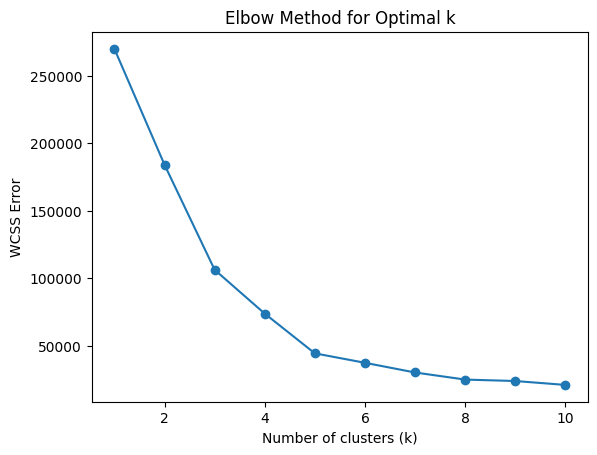

In [10]:
plt.plot(k_values, wcss_error, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS Error')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
data['Cluster']=kmeans.fit_predict(data[['Annual Income', 'Spending Score']])
data.head()

,Annual Income,Spending Score,Cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [12]:
data['Cluster']

0      2
1      3
2      2
3      3
4      2
      ..
195    0
196    1
197    0
198    1
199    0
Name: Cluster, Length: 200, dtype: int32

In [13]:
data['Cluster'].value_counts()  

Cluster
3    99
0    39
4    29
2    23
1    10
Name: count, dtype: int64

In [14]:
c0=data[data['Cluster']==0]
c0.head()

,Annual Income,Spending Score,Cluster
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0


In [17]:
c1=data[data['Cluster']==1]
c1.head()

,Annual Income,Spending Score,Cluster
180,97,32,1
182,98,15,1
184,99,39,1
186,101,24,1
188,103,17,1


In [18]:
c2=data[data['Cluster']==2]
c2.head()

,Annual Income,Spending Score,Cluster
0,15,39,2
2,16,6,2
4,17,40,2
6,18,6,2
8,19,3,2


In [19]:
c3=data[data['Cluster']==3]
c3.head()

,Annual Income,Spending Score,Cluster
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3


In [20]:
c4=data[data['Cluster']==4]
c4.head()

,Annual Income,Spending Score,Cluster
121,67,40,4
124,70,29,4
126,71,35,4
128,71,11,4
130,71,9,4


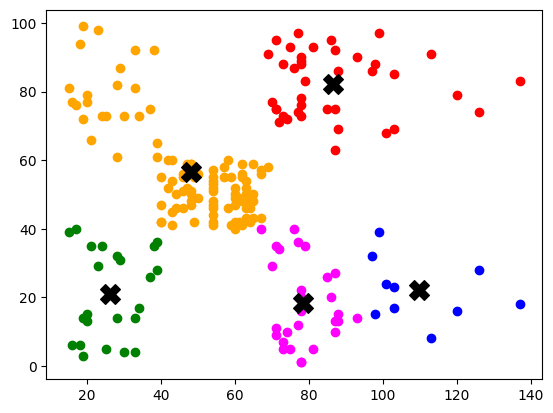

In [26]:
plt.scatter(c0['Annual Income'], c0['Spending Score'], color='red', label='Cluster 0')
plt.scatter(c1['Annual Income'], c1['Spending Score'], color='blue', label='Cluster 1')
plt.scatter(c2['Annual Income'], c2['Spending Score'], color='green', label='Cluster 2')
plt.scatter(c3['Annual Income'], c3['Spending Score'], color='Orange', label='Cluster 3')
plt.scatter(c4['Annual Income'], c4['Spending Score'], color='magenta', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='X', s=200, label='Centroids')

In [24]:
kmeans.cluster_centers_

array([[ 86.53846154,  82.12820513],
       [109.7       ,  22.        ],
       [ 26.30434783,  20.91304348],
       [ 48.07070707,  56.64646465],
       [ 78.48275862,  18.20689655]])